In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

/home/msain/Principles of Computational Intelligence/projects: ['OCR', 'Stocks Prediction']
/home/msain/Principles of Computational Intelligence/projects/Stocks Prediction: ['dataset', 'dataset.zip', '.ipynb_checkpoints', 'data.csv', 'rebuilt.dataset.zip', '.~lock.data.xls#', '.~lock.data.csv#', 'Untitled.ipynb', 'rebuilt.dataset_old.zip', 'data.xls']


In [2]:
# import all stock prices 
df = pd.read_csv("./data.csv", index_col = 0)

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.date))))


number of different stocks:  1910


In [4]:
df.tail()

,نماد,volume,ارزش,دفعات معامله,high,low,close,close_diff,درصد قیمت پایانی,مقدار آخرین قیمت,تغییر آخرین قیمت,درصد آخرین قیمت,قیمت روز قبل,ارزش بازار,date
تاریخ,,,,,,,,,,,,,,,
1397/6/27,شنفت1,83121,862380375,25,10375,10375,9963,82,0.829876,10375,494,4.999494,9881,12453750000000,1397/6/27
1397/6/31,شنفت1,345495,3614223195,49,10461,10461,10307,344,3.452775,10461,498,4.998494,9963,12883750000000,1397/6/31
1397/7/1,شنفت1,94155,1018945410,19,10822,10822,10404,97,0.941108,10822,515,4.996604,10307,13005000000000,1397/7/1
1397/7/2,شنفت1,124921,1364637004,21,10924,10924,10534,130,1.249519,10924,520,4.998078,10404,13167500000000,1397/7/2
1397/7/3,شنفت1,103243,1141867580,8,11060,11060,10643,109,1.034745,11060,526,4.993355,10534,13303750000000,1397/7/3


In [5]:
df.describe()

,volume,ارزش,دفعات معامله,high,low,close,close_diff,درصد قیمت پایانی,مقدار آخرین قیمت,تغییر آخرین قیمت,درصد آخرین قیمت,قیمت روز قبل,ارزش بازار
count,1.910000e+03,1.910000e+03,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1.910000e+03
mean,3.302745e+05,3.780866e+09,52.367539,8944.072775,8732.549738,8935.109424,19.990052,0.196753,8830.956021,-84.163351,-0.878157,8915.119372,1.116889e+13
std,1.339545e+06,2.846894e+10,84.400316,8912.716435,8696.797748,8899.236395,331.021136,2.346566,8786.784881,480.486741,3.488268,8881.036759,1.112405e+13
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,3034.000000,-5691.000000,-27.856644,2977.000000,-5704.000000,-27.856644,3034.000000,3.792500e+12
25%,1.560100e+04,9.200333e+07,9.000000,4440.000000,4360.000000,4449.000000,-25.000000,-0.379803,4399.250000,-193.750000,-3.645326,4449.000000,5.561250e+12
50%,5.959400e+04,3.644794e+08,25.000000,5400.000000,5299.000000,5349.000000,-2.500000,-0.045157,5344.500000,-87.000000,-1.630068,5326.500000,6.686250e+12
75%,1.831458e+05,1.402292e+09,58.000000,8437.250000,8043.750000,8279.000000,19.750000,0.312719,8239.500000,78.500000,1.361669,8260.500000,1.034875e+13
max,1.704890e+07,5.519550e+11,897.000000,51640.000000,49654.000000,50017.000000,5164.000000,44.574067,49654.000000,5942.000000,45.667760,50017.000000,6.252125e+13


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1910 entries, 1387/9/24 to 1397/7/3
Data columns (total 15 columns):
نماد                1910 non-null object
volume              1910 non-null int64
ارزش                1910 non-null int64
دفعات معامله        1910 non-null int64
high                1910 non-null int64
low                 1910 non-null int64
close               1910 non-null int64
close_diff          1910 non-null int64
درصد قیمت پایانی    1910 non-null float64
مقدار آخرین قیمت    1910 non-null int64
تغییر آخرین قیمت    1910 non-null int64
درصد آخرین قیمت     1910 non-null float64
قیمت روز قبل        1910 non-null int64
ارزش بازار          1910 non-null int64
date                1910 non-null object
dtypes: float64(2), int64(11), object(2)
memory usage: 238.8+ KB


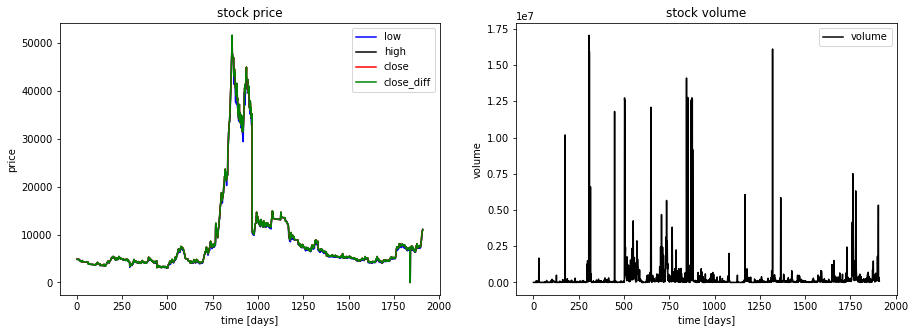

In [7]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df.low.values, color='blue', label='low')
plt.plot(df.high.values, color='black', label='high')
plt.plot(df.high.values, color='red', label='close')
plt.plot(df.high.values, color='green', label='close_diff')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df.volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [10]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['close_diff'] = min_max_scaler.fit_transform(df.close_diff.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df.close.values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

# choose one stock
df_stock = df.filter(["close","low","high","close_diff"], axis=1)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)


# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)


# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)
print(x_train[])

df_stock.columns.values =  ['close', 'low', 'high', 'close_diff']
x_train.shape =  (1512, 19, 4)
y_train.shape =  (1512, 4)
x_valid.shape =  (189, 19, 4)
y_valid.shape =  (189, 4)
x_test.shape =  (189, 19, 4)
y_test.shape =  (189, 4)
[[0.04131282 0.09729327 0.09355151 0.52381391]
 [0.04127025 0.09719257 0.09345469 0.52409028]
 [0.04127025 0.09715229 0.09341596 0.52427453]
 [0.04127025 0.09715229 0.09341596 0.52427453]
 [0.04124896 0.09715229 0.09341596 0.5241824 ]
 [0.04122768 0.09713215 0.09339659 0.5241824 ]
 [0.04120639 0.09711202 0.09337723 0.5241824 ]
 [0.04118511 0.09709188 0.09335786 0.5241824 ]
 [0.04112126 0.09707174 0.0933385  0.52399816]
 [0.04112126 0.09703146 0.09329977 0.52427453]
 [0.04112126 0.09703146 0.09329977 0.52427453]
 [0.04101484 0.09703146 0.09329977 0.52381391]
 [0.04099355 0.09693076 0.09320294 0.5241824 ]
 [0.03758806 0.09662867 0.09310612 0.50953478]
 [0.03758806 0.09376888 0.09016266 0.52427453]
 [0.03758806 0.09376888 0.09016266 0.52427453]
 [0.03452313 0

/home/msain/anaconda3/envs/tensorflow_cpuenv/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/msain/anaconda3/envs/tensorflow_cpuenv/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/msain/anaconda3/envs/tensorflow_cpuenv/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/msain/anaconda3/envs/tensorflow_cpuenv/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/msain/anaconda3/envs/t

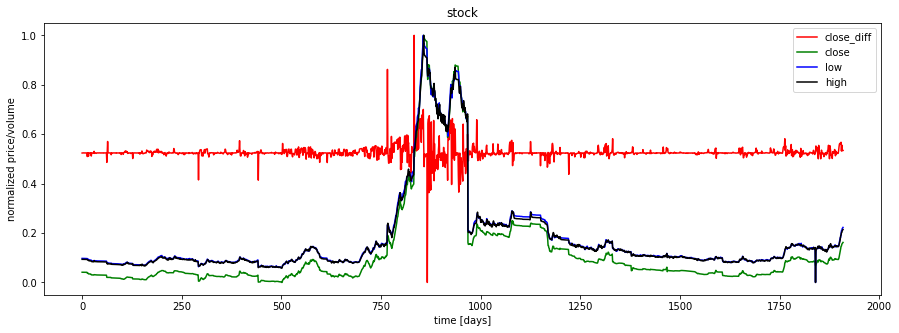

In [65]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.close_diff.values, color='red', label='close_diff')
plt.plot(df_stock_norm.close.values, color='green', label='close')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [73]:

## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# use Basic LSTM Cell 
#layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
#          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.074790/0.063152
4.99 epochs: MSE train/valid = 0.000655/0.000084
9.99 epochs: MSE train/valid = 0.000526/0.000024
14.98 epochs: MSE train/valid = 0.000533/0.000104
19.97 epochs: MSE train/valid = 0.000502/0.000096
24.97 epochs: MSE train/valid = 0.000433/0.000011
29.96 epochs: MSE train/valid = 0.000434/0.000027
34.95 epochs: MSE train/valid = 0.000395/0.000017
39.95 epochs: MSE train/valid = 0.000595/0.000238
44.94 epochs: MSE train/valid = 0.000407/0.000028
49.93 epochs: MSE train/valid = 0.000464/0.000112
54.93 epochs: MSE train/valid = 0.000409/0.000037
59.92 epochs: MSE train/valid = 0.000423/0.000067
64.91 epochs: MSE train/valid = 0.000513/0.000086
69.91 epochs: MSE train/valid = 0.000402/0.000043
74.90 epochs: MSE train/valid = 0.000413/0.000061
79.89 epochs: MSE train/valid = 0.000582/0.000037
84.89 epochs: MSE train/valid = 0.000411/0.000026
89.88 epochs: MSE train/valid = 0.000405/0.000044
94.87 epochs: MSE train/valid = 0.000391/0.000026
99.

In [74]:
y_train.shape

(1512, 4)

correct sign prediction for close - open price for train/valid/test: 0.98/1.00/0.99


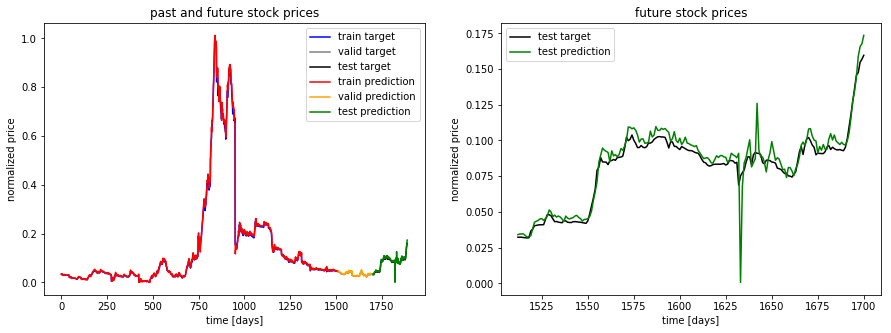

In [75]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))